In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Entre hermanos,1984
1,Warning: Apocalypse 2012,2012
2,One Dark Night,1939
3,Jungle Siren,1942
4,Shreelancer,2017


In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [17]:
superman_and_batman_years = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')].groupby(['year', 'character']).size().unstack().fillna(0)
# batman_years = cast[cast['character'] == 'Batman'].groupby(['year', 'character']).size()

In [18]:
superman_and_batman_years

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0
1950,0.0,1.0
1951,0.0,2.0
1953,2.0,0.0
1954,0.0,5.0


In [21]:
super_years = superman_and_batman_years[ superman_and_batman_years['Superman'] > superman_and_batman_years['Batman'] ]
super_years

character,Batman,Superman
year,,
1948,0.0,1.0
1950,0.0,1.0
1951,0.0,2.0
1954,0.0,5.0
1955,0.0,1.0
1973,1.0,2.0
1978,0.0,1.0
1980,0.0,2.0
1983,0.0,2.0


In [22]:
len(super_years)

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [23]:
batman_years = superman_and_batman_years[ superman_and_batman_years['Superman'] < superman_and_batman_years['Batman'] ]
batman_years

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1949,2.0,0.0
1953,2.0,0.0
1957,2.0,0.0
1965,1.0,0.0
1966,1.0,0.0
1967,1.0,0.0


In [24]:
len(batman_years)

26

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<Axes: xlabel='year'>

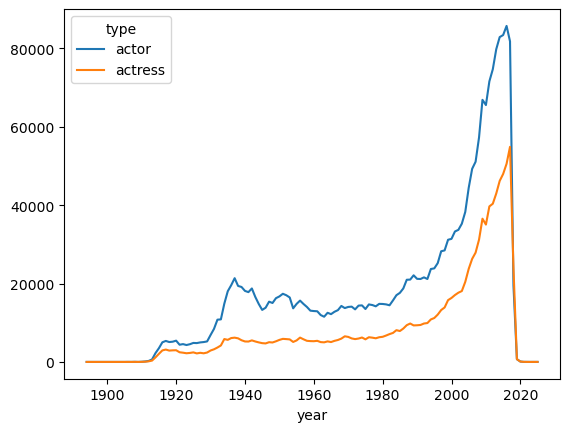

In [40]:
cast.groupby(['year', 'type'])['name'].count().unstack().fillna(0)[:-1].plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<Axes: xlabel='year'>

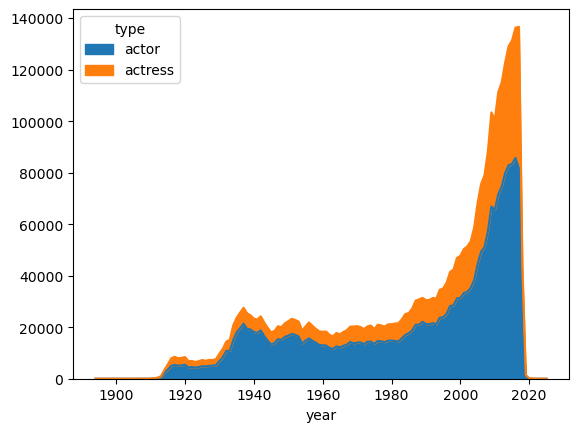

In [45]:
actors_v_actresses = cast.groupby(['year', 'type'])['name'].count().unstack().fillna(0)[:-1]
actors_v_actresses.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [46]:
delta = actors_v_actresses['actor'] - actors_v_actresses['actress']

<Axes: xlabel='year'>

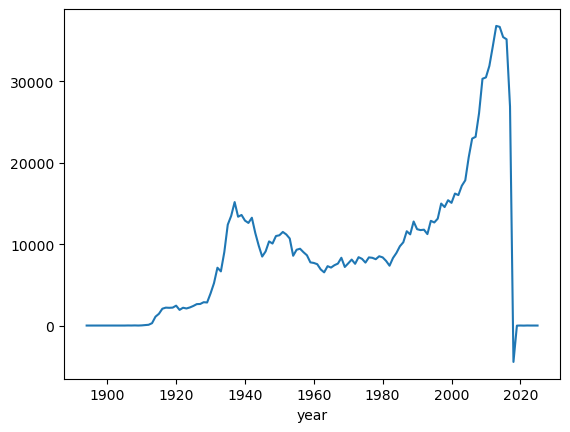

In [50]:
delta.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

<Axes: xlabel='year', ylabel='0'>

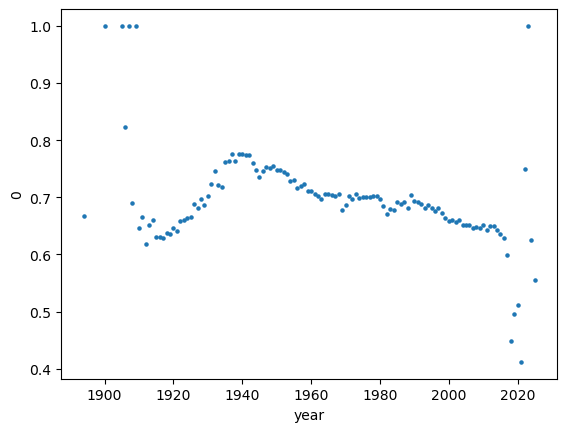

In [72]:
actor_fraction = actors_v_actresses['actor'] / (actors_v_actresses['actor'] + actors_v_actresses['actress'])
actor_fraction.reset_index()
actor_fraction.reset_index().plot(kind='scatter', x = 'year', y = 0, s=5)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<Axes: xlabel='year', ylabel='0'>

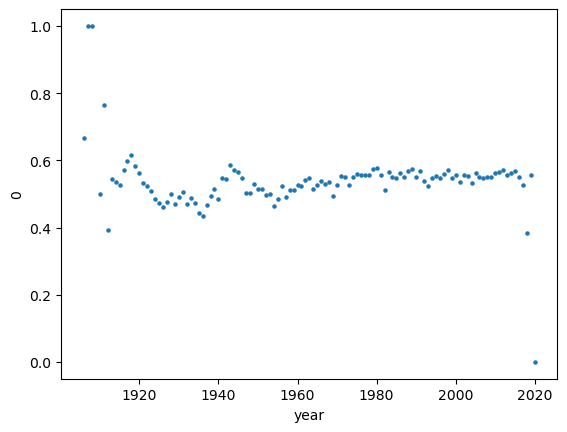

In [105]:
# actors = cast[ cast['type'] == 'actor' ]
# actors_v_actresses = cast.groupby(['year', 'type'])['name'].count().unstack().fillna(0)[:-1]
supporting_actors = cast[ cast['n'] == 2 ]
sa = supporting_actors.groupby(['year', 'type']).size().unstack().fillna(0)[:]
# sa = sa['type']
sa
supporting_actors_fraction = sa['actor'] / (sa['actor'] + sa['actress'])
supporting_actors_fraction.head()
supporting_actors_fraction.fillna(0).reset_index().plot(kind='scatter', x='year', y=0, s=5)

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

<Axes: xlabel='year'>

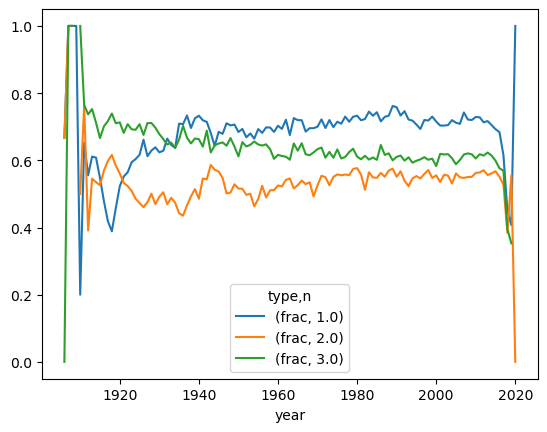

In [127]:
# actors = cast[ cast['type'] == 'actor' ]
# actors_v_actresses = cast.groupby(['year', 'type'])['name'].count().unstack().fillna(0)[:-1]
supporting_actors = cast[ (cast['n'] >= 1) & (cast['n'] <= 3) ]
sa = supporting_actors.groupby(['year', 'n', 'type']).size().unstack().fillna(0)[:]
# sa = sa['type']
# sa
sa['frac'] = sa['actor'] / (sa['actor'] + sa['actress'])
sa = sa.drop(['actor', 'actress'], axis=1)
sa.unstack().plot()
# supporting_actors_fraction.head()
# sa.fillna(0).reset_index().plot()